# **1.Carbon Dioxide Emission prediction using Linear Regression and an Optimisation algorithm** 



### **1.1 INSTALLING LIBRARIES**

In [ ]:
!pip install -U scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import sklearn
print(sklearn.__version__)
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
pd.set_option('max_columns', None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
1.0.2


###**1.2 DATA LOADING**

In [ ]:
df = pd.read_csv('/content/MY2022 Fuel Consumption Ratings.csv')
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


  
### **1.3 DATA CLEANING**








  **1.2.1 Change Cases**



In [ ]:
df.shape

(946, 15)

In [ ]:
df.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.upper()

In [ ]:
df.columns 

Index(['MODEL YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE(L)',
       'CYLINDERS', 'TRANSMISSION', 'FUEL TYPE',
       'FUEL CONSUMPTION (CITY (L/100 KM)', 'FUEL CONSUMPTION(HWY (L/100 KM))',
       'FUEL CONSUMPTION(COMB (L/100 KM))', 'FUEL CONSUMPTION(COMB (MPG))',
       'CO2 EMISSIONS(G/KM)', 'CO2 RATING', 'SMOG RATING'],
      dtype='object')

**1.2.2 Renaming Columns to avoid space**

In [ ]:
df.rename (columns = {'MAKE' : 'BRAND' , 'MODEL YEAR': 'MODEL_YEAR' , 'VEHICLE CLASS' : 'VEHICLE_CLASS' , 'ENGINE SIZE(L)' : 'ENGINE_SIZE_L', 'FUEL TYPE' : 'FUEL_TYPE' , 'FUEL CONSUMPTION (CITY (L/100 KM)' : 'FUEL_CONSUMPTION_CITY_L/100KM' , 'FUEL CONSUMPTION(HWY (L/100 KM))' : 'FUEL_CONSUMPTION_HWY_L/100KM' , 'FUEL CONSUMPTION(COMB (L/100 KM))' : 'FUEL_CONSUMPTION_COMB_L/100KM' , 'FUEL CONSUMPTION(COMB (MPG))' : 'FUEL_CONSUMPTION_COMB_MPG' , 'CO2 EMISSIONS(G/KM)' : 'CO2_EMISSIONS' , 'CO2 RATING' : 'CO2_RATING' , 'SMOG RATING' : 'SMOG_RATING' }, inplace = True)

**1.2.3 Checking for missing data**

In [ ]:
df.isnull()

,MODEL_YEAR,BRAND,MODEL,VEHICLE_CLASS,ENGINE_SIZE_L,CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONSUMPTION_CITY_L/100KM,FUEL_CONSUMPTION_HWY_L/100KM,FUEL_CONSUMPTION_COMB_L/100KM,FUEL_CONSUMPTION_COMB_MPG,CO2_EMISSIONS,CO2_RATING,SMOG_RATING
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
942,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
943,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
944,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().any()        #columns with missing values represented in boolean terms.
                         #False means it doesn't have a missing value.

MODEL_YEAR                       False
BRAND                            False
MODEL                            False
VEHICLE_CLASS                    False
ENGINE_SIZE_L                    False
CYLINDERS                        False
TRANSMISSION                     False
FUEL_TYPE                        False
FUEL_CONSUMPTION_CITY_L/100KM    False
FUEL_CONSUMPTION_HWY_L/100KM     False
FUEL_CONSUMPTION_COMB_L/100KM    False
FUEL_CONSUMPTION_COMB_MPG        False
CO2_EMISSIONS                    False
CO2_RATING                       False
SMOG_RATING                      False
dtype: bool

In [ ]:
#for entire dataset 
df.isnull().any().any()

False

In [ ]:
df.isnull().sum()      #number of null vaues in each column

MODEL_YEAR                       0
BRAND                            0
MODEL                            0
VEHICLE_CLASS                    0
ENGINE_SIZE_L                    0
CYLINDERS                        0
TRANSMISSION                     0
FUEL_TYPE                        0
FUEL_CONSUMPTION_CITY_L/100KM    0
FUEL_CONSUMPTION_HWY_L/100KM     0
FUEL_CONSUMPTION_COMB_L/100KM    0
FUEL_CONSUMPTION_COMB_MPG        0
CO2_EMISSIONS                    0
CO2_RATING                       0
SMOG_RATING                      0
dtype: int64

In [ ]:
df.isnull().sum().sum()    #getting total number of null values 

0

###**1.4 DATA VISUALIZATION**




 **Q.1 Which brand is emitting the most CO2?**

  ***graph_1*** represents the categorical data *BRAND* vs *CO2 Emissions(g/km)*.


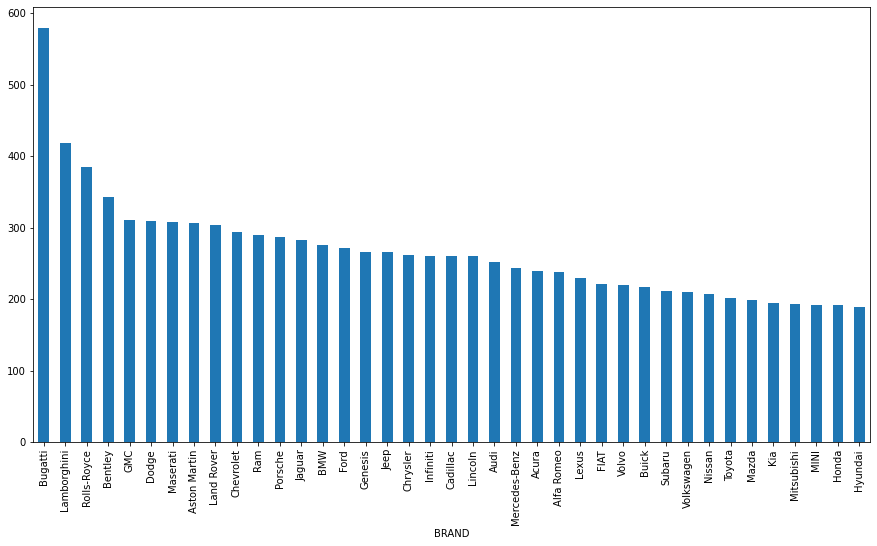

In [ ]:
plt.figure(figsize=(15,8))
graph_1 = df.groupby('BRAND')['CO2_EMISSIONS'].mean().sort_values(ascending = False).plot(x='BRAND',y='CO2_EMISSIONS',kind = 'bar')
graph_1

***graph_2*** is also a bar chart plotted between *BRAND* and *CO2_RATING*


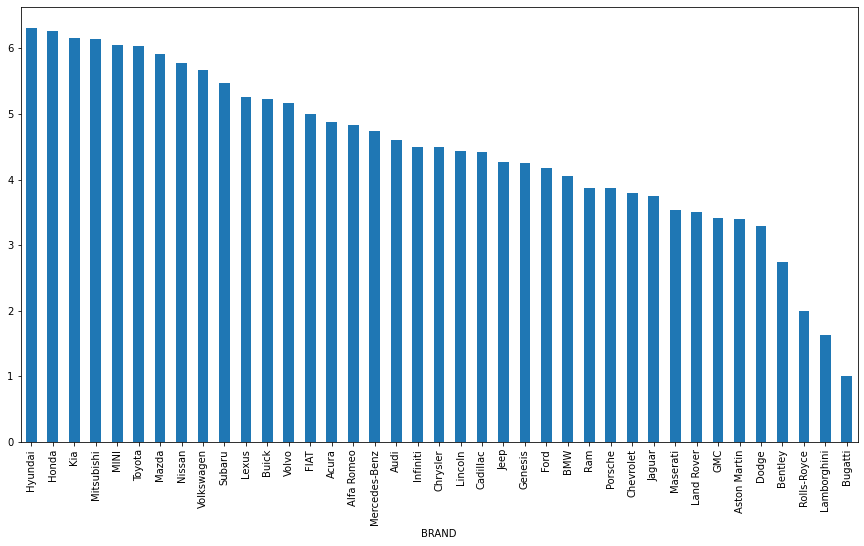

In [ ]:
#low CO2 Rating means the brand emits the most CO2 out of others.
plt.figure(figsize=(15,8))
graph_2 = df.groupby('BRAND')['CO2_RATING'].mean().sort_values(ascending = False).plot(kind = 'bar')
graph_2     


**Q.2 Which column is in correlation with *CO2_EMISSIONS*?**

  **Q.3 Which *VEHICLE_CLASS* is more efficient?**

  ***graph_3*** shows us which *VEHICLE_CLASS* is more efficient with less number of data points and also portrays the linear relation between *CO2_EMISSIONS* and *FUEL_CONSUMPTION_COMB_L/100KM*

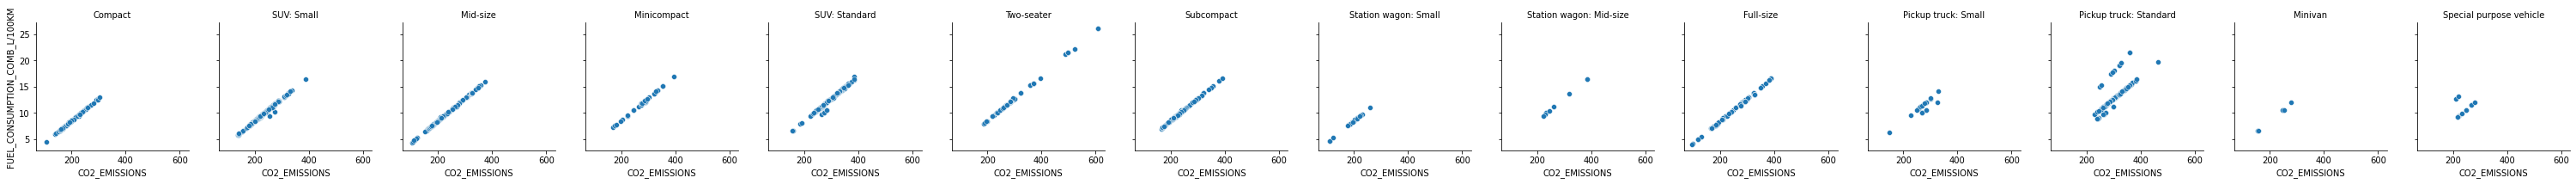

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns    
graph_3 = sns.FacetGrid(df, col = 'VEHICLE_CLASS')
graph_3.map_dataframe(sns.scatterplot,x='CO2_EMISSIONS', y='FUEL_CONSUMPTION_COMB_L/100KM')        #click on graphs to zoom the graphs.
graph_3.set_axis_labels('CO2_EMISSIONS','FUEL_CONSUMPTION_COMB_L/100KM')
graph_3.set_titles(col_template = '{col_name}')

       

**C) What is the best Engine Size for low CO2 Emissions?**

***graph_4*** also shows the correlation between *CO2 EMISSIONS* and *FUEL_CONSUMPTION_COMB_L/100KM* with respect to their Engine Size. 

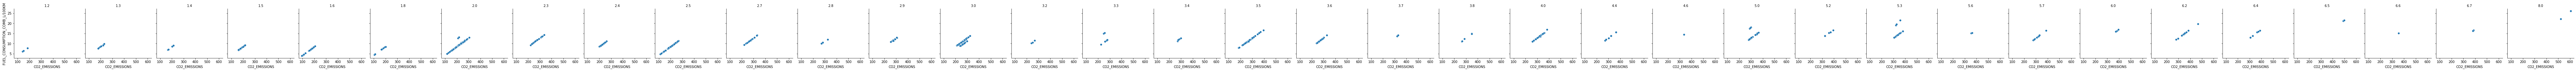

In [ ]:
graph_4 = sns.FacetGrid(df, col = 'ENGINE_SIZE_L')
graph_4.map_dataframe(sns.scatterplot,x='CO2_EMISSIONS', y='FUEL_CONSUMPTION_COMB_L/100KM')
graph_4.set_axis_labels('CO2_EMISSIONS','FUEL_CONSUMPTION_COMB_L/100KM')
graph_4.set_titles(col_template = '{col_name}')


**Q.4 Are all Fuel Consumption metrics correlated?**

***graph_5***, ***graph_6*** and ***graph_7*** show correlation between the Fuel Consumption metrics.

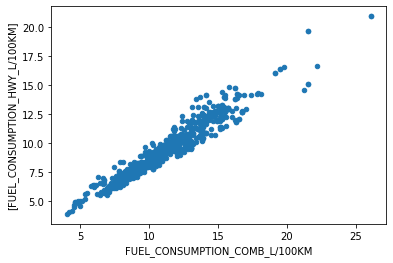

In [ ]:
graph_5 = df.plot(x="FUEL_CONSUMPTION_COMB_L/100KM", y=["FUEL_CONSUMPTION_HWY_L/100KM"], kind="scatter")
graph_5

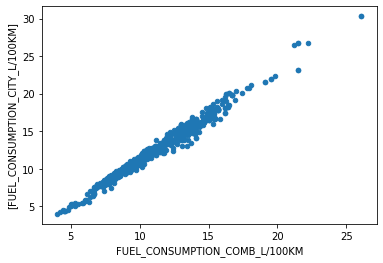

In [ ]:
graph_6 = df.plot(x="FUEL_CONSUMPTION_COMB_L/100KM", y=["FUEL_CONSUMPTION_CITY_L/100KM"], kind="scatter")
graph_6

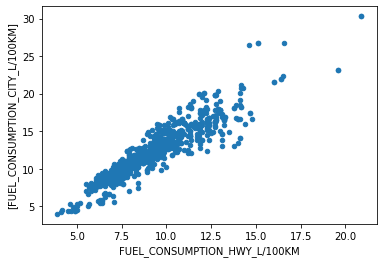

In [ ]:
graph_7 = df.plot(x="FUEL_CONSUMPTION_HWY_L/100KM", y=["FUEL_CONSUMPTION_CITY_L/100KM"], kind="scatter")
graph_7

*As seen above, they are correlated*

**Q.5 Which columns are correlated?**

***graph_8*** shows us the correlation between all the columns and helps us determine independent and dependent variables. 

In [ ]:
df.corr()

,MODEL_YEAR,ENGINE_SIZE_L,CYLINDERS,FUEL_CONSUMPTION_CITY_L/100KM,FUEL_CONSUMPTION_HWY_L/100KM,FUEL_CONSUMPTION_COMB_L/100KM,FUEL_CONSUMPTION_COMB_MPG,CO2_EMISSIONS,CO2_RATING,SMOG_RATING
MODEL_YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINE_SIZE_L,NaN,1.000000,0.920698,0.834925,0.749374,0.818694,-0.704163,0.824188,-0.766333,-0.448239
CYLINDERS,NaN,0.920698,1.000000,0.845688,0.737652,0.821718,-0.693594,0.833241,-0.762157,-0.502149
FUEL_CONSUMPTION_CITY_L/100KM,NaN,0.834925,0.845688,1.000000,0.922850,0.990321,-0.909477,0.965632,-0.920524,-0.523928
FUEL_CONSUMPTION_HWY_L/100KM,NaN,0.749374,0.737652,0.922850,1.000000,0.967138,-0.877531,0.933991,-0.894668,-0.402099
FUEL_CONSUMPTION_COMB_L/100KM,NaN,0.818694,0.821718,0.990321,0.967138,1.000000,-0.914305,0.971671,-0.927705,-0.490473
FUEL_CONSUMPTION_COMB_MPG,NaN,-0.704163,-0.693594,-0.909477,-0.877531,-0.914305,1.000000,-0.913019,0.949561,0.473990
CO2_EMISSIONS,NaN,0.824188,0.833241,0.965632,0.933991,0.971671,-0.913019,1.000000,-0.954593,-0.520437
CO2_RATING,NaN,-0.766333,-0.762157,-0.920524,-0.894668,-0.927705,0.949561,-0.954593,1.000000,0.502625
SMOG_RATING,NaN,-0.448239,-0.502149,-0.523928,-0.402099,-0.490473,0.473990,-0.520437,0.502625,1.000000


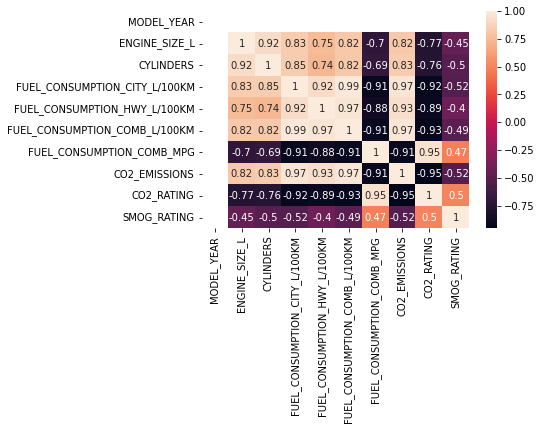

In [ ]:
import seaborn as sns
%matplotlib inline
graph_8 = sns.heatmap(df.corr(),xticklabels=True, yticklabels=True, annot=True)
graph_8

***graph_9*** is a joint plot and it shows us the distribution of 
*CO2 EMISSIONS* and *ENGINE SIZE* and also it helps us determine outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Figure size 864x720 with 0 Axes>

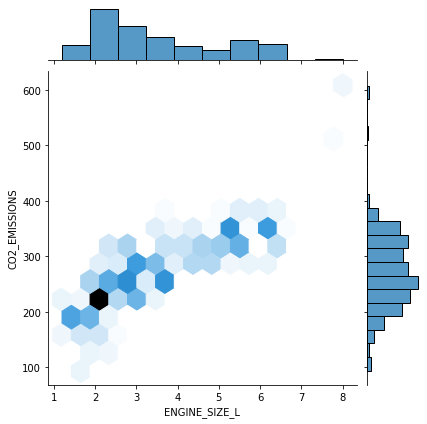

In [ ]:
plt.figure(figsize=(12,10))
graph_9 = sns.jointplot(df['ENGINE_SIZE_L'].head(500), df['CO2_EMISSIONS'].head(500), kind='hex')
graph_9

**Q.6 How many outliers are there in *CO2_EMISSIONS*?**

***graph_10*** visually helps us determine the values of outliers by placing the mouse cursor.

In [ ]:
import plotly.express as px
fig = px.box(df, y="CO2_EMISSIONS")
fig.show()

***graph_11*** represents normal distribution of *CO2_EMISSIONS*.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'CO2_EMISSIONS is normally distributed.')

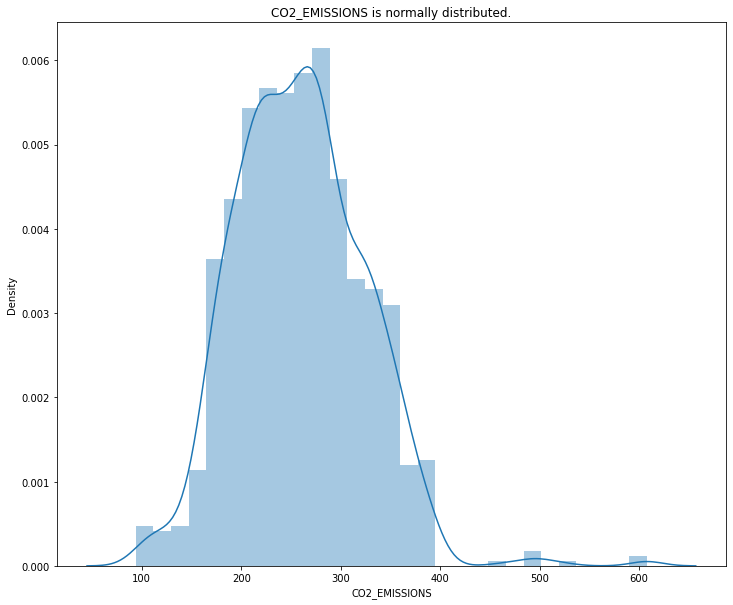

In [ ]:
plt.figure(figsize=(12,10))
sns.distplot(df['CO2_EMISSIONS'])
plt.title("CO2_EMISSIONS is normally distributed.")

###**1.5 DATA PREPROCESSING**

In [ ]:
#checking the datatypes
df.dtypes

MODEL_YEAR                         int64
BRAND                             object
MODEL                             object
VEHICLE_CLASS                     object
ENGINE_SIZE_L                    float64
CYLINDERS                          int64
TRANSMISSION                      object
FUEL_TYPE                         object
FUEL_CONSUMPTION_CITY_L/100KM    float64
FUEL_CONSUMPTION_HWY_L/100KM     float64
FUEL_CONSUMPTION_COMB_L/100KM    float64
FUEL_CONSUMPTION_COMB_MPG          int64
CO2_EMISSIONS                      int64
CO2_RATING                         int64
SMOG_RATING                        int64
dtype: object

In [ ]:
#understanding categorical data and converting it into int
df.BRAND.unique()

array(['Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'Bentley', 'BMW',
       'Bugatti', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge',
       'FIAT', 'Ford', 'Genesis', 'GMC', 'Honda', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus',
       'Lincoln', 'Maserati', 'Mazda', 'Mercedes-Benz', 'MINI',
       'Mitsubishi', 'Nissan', 'Porsche', 'Ram', 'Rolls-Royce', 'Subaru',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [ ]:
from sklearn import preprocessing

lab_en = preprocessing.LabelEncoder()
df['BRAND'] = lab_en.fit_transform(df['BRAND'])
df['MODEL'] = lab_en.fit_transform(df['MODEL'])
df['VEHICLE_CLASS'] = lab_en.fit_transform(df['VEHICLE_CLASS'])
df['TRANSMISSION'] = lab_en.fit_transform(df['TRANSMISSION'])
df['FUEL_TYPE'] = lab_en.fit_transform(df['FUEL_TYPE'])
df

,MODEL_YEAR,BRAND,MODEL,VEHICLE_CLASS,ENGINE_SIZE_L,CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONSUMPTION_CITY_L/100KM,FUEL_CONSUMPTION_HWY_L/100KM,FUEL_CONSUMPTION_COMB_L/100KM,FUEL_CONSUMPTION_COMB_MPG,CO2_EMISSIONS,CO2_RATING,SMOG_RATING
0,2022,0,349,0,2.4,4,7,3,9.9,7.0,8.6,33,200,6,3
1,2022,0,410,7,3.5,6,8,3,12.6,9.4,11.2,25,263,4,5
2,2022,0,513,7,2.0,4,8,3,11.0,8.6,9.9,29,232,5,6
3,2022,0,514,7,2.0,4,8,3,11.3,9.1,10.3,27,242,5,6
4,2022,0,615,0,2.0,4,8,3,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,38,695,7,2.0,4,12,3,10.7,7.7,9.4,30,219,5,5
942,2022,38,696,7,2.0,4,12,3,10.5,8.1,9.4,30,219,5,5
943,2022,38,697,7,2.0,4,12,3,11.0,8.7,9.9,29,232,5,7
944,2022,38,698,8,2.0,4,12,3,11.5,8.4,10.1,28,236,5,5


###**1.6 Linear Regression Model with and without SGD**

***Case -1***

In this case we have considered CO2_EMISSIONS as dependent variable and the other columns as Independent variables after eliminating Fuel consumption for City, Combined mpg and Cylinders.  

In [ ]:
x=df[['MODEL_YEAR','BRAND','MODEL', 'VEHICLE_CLASS', 'ENGINE_SIZE_L','FUEL_CONSUMPTION_COMB_L/100KM', 'TRANSMISSION', 'FUEL_TYPE','CO2_RATING', 'SMOG_RATING']]
y=df[['CO2_EMISSIONS']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
print('shape for x_train: ',x_train.shape)
print('shape for x_test: ',x_test.shape)
print('shape for y_train: ',y_train.shape)
print('shape for y_test: ',y_test.shape)


stnsc = StandardScaler()
x_train = stnsc.fit_transform(x_train)
x_test = stnsc.fit_transform(x_test)

model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
print(
    'number of predicted values: ',y_pred.shape)

# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, y_pred))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred))


#r2 score
r2_score_case1 = r2_score(y_test, y_pred)
print('r2 score for this case is ',r2_score_case1)

shape for x_train:  (662, 10)
shape for x_test:  (284, 10)
shape for y_train:  (662, 1)
shape for y_test:  (284, 1)
number of predicted values:  (284, 1)
mean_squared_error :  217.15490777730793
mean_absolute_error :  6.65613737302523
r2 score for this case is  0.9406404317450392


**Linear Regression with Stocastic Gradient Descent**

We will use *penalty= None* , since predictions is equal to test data.  

In [ ]:
# Tuning the SGDRegressor parameters 'eta0' (learning rate) and 'max_iter' using Grid Search
sgdr = SGDRegressor(random_state = 1, penalty = None)
grid_param = {'eta0': [.0001, .001, .01, .1, 1], 'max_iter':[10000, 20000, 30000, 40000]}
gd_sr = GridSearchCV(estimator=sgdr, param_grid=grid_param, scoring = 'r2', refit='r2', cv=5, verbose=5)
gd_sr.fit(x_train, y_train)





Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END .......eta0=0.0001, max_iter=10000;, score=0.957 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END .......eta0=0.0001, max_iter=10000;, score=0.969 total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END .......eta0=0.0001, max_iter=10000;, score=0.968 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END .......eta0=0.0001, max_iter=10000;, score=0.971 total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END .......eta0=0.0001, max_iter=10000;, score=0.980 total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END .......eta0=0.0001, max_iter=20000;, score=0.957 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END .......eta0=0.0001, max_iter=20000;, score=0.969 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END .......eta0=0.0001, max_iter=20000;, score=0.968 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END .......eta0=0.0001, max_iter=20000;, score=0.971 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END .......eta0=0.0001, max_iter=20000;, score=0.980 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END .......eta0=0.0001, max_iter=30000;, score=0.957 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END .......eta0=0.0001, max_iter=30000;, score=0.969 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END .......eta0=0.0001, max_iter=30000;, score=0.968 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END .......eta0=0.0001, max_iter=30000;, score=0.971 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END .......eta0=0.0001, max_iter=30000;, score=0.980 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END .......eta0=0.0001, max_iter=40000;, score=0.957 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END .......eta0=0.0001, max_iter=40000;, score=0.969 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END .......eta0=0.0001, max_iter=40000;, score=0.968 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END .......eta0=0.0001, max_iter=40000;, score=0.971 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END .......eta0=0.0001, max_iter=40000;, score=0.980 total time=   0.3s
[CV 1/5] END ........eta0=0.001, max_iter=10000;, score=0.960 total time=   0.1s
[CV 2/5] END ........eta0=0.001, max_iter=10000;, score=0.970 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END ........eta0=0.001, max_iter=10000;, score=0.964 total time=   0.1s
[CV 4/5] END ........eta0=0.001, max_iter=10000;, score=0.976 total time=   0.1s
[CV 5/5] END ........eta0=0.001, max_iter=10000;, score=0.982 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END ........eta0=0.001, max_iter=20000;, score=0.960 total time=   0.1s
[CV 2/5] END ........eta0=0.001, max_iter=20000;, score=0.970 total time=   0.1s
[CV 3/5] END ........eta0=0.001, max_iter=20000;, score=0.964 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END ........eta0=0.001, max_iter=20000;, score=0.976 total time=   0.1s
[CV 5/5] END ........eta0=0.001, max_iter=20000;, score=0.982 total time=   0.1s
[CV 1/5] END ........eta0=0.001, max_iter=30000;, score=0.960 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END ........eta0=0.001, max_iter=30000;, score=0.970 total time=   0.1s
[CV 3/5] END ........eta0=0.001, max_iter=30000;, score=0.964 total time=   0.1s
[CV 4/5] END ........eta0=0.001, max_iter=30000;, score=0.976 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END ........eta0=0.001, max_iter=30000;, score=0.982 total time=   0.1s
[CV 1/5] END ........eta0=0.001, max_iter=40000;, score=0.960 total time=   0.1s
[CV 2/5] END ........eta0=0.001, max_iter=40000;, score=0.970 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END ........eta0=0.001, max_iter=40000;, score=0.964 total time=   0.1s
[CV 4/5] END ........eta0=0.001, max_iter=40000;, score=0.976 total time=   0.1s
[CV 5/5] END ........eta0=0.001, max_iter=40000;, score=0.982 total time=   0.1s
[CV 1/5] END .........eta0=0.01, max_iter=10000;, score=0.960 total time=   0.0s
[CV 2/5] END .........eta0=0.01, max_iter=10000;, score=0.970 total time=   0.0s
[CV 3/5] END .........eta0=0.01, max_iter=10000;, score=0.964 total time=   0.0s
[CV 4/5] END .........eta0=0.01, max_iter=10000;, score=0.977 total time=   0.0s
[CV 5/5] END .........eta0=0.01, max_iter=10000;, score=0.982 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConv

[CV 1/5] END .........eta0=0.01, max_iter=20000;, score=0.960 total time=   0.0s
[CV 2/5] END .........eta0=0.01, max_iter=20000;, score=0.970 total time=   0.0s
[CV 3/5] END .........eta0=0.01, max_iter=20000;, score=0.964 total time=   0.0s
[CV 4/5] END .........eta0=0.01, max_iter=20000;, score=0.977 total time=   0.0s
[CV 5/5] END .........eta0=0.01, max_iter=20000;, score=0.982 total time=   0.0s
[CV 1/5] END .........eta0=0.01, max_iter=30000;, score=0.960 total time=   0.0s
[CV 2/5] END .........eta0=0.01, max_iter=30000;, score=0.970 total time=   0.0s
[CV 3/5] END .........eta0=0.01, max_iter=30000;, score=0.964 total time=   0.0s
[CV 4/5] END .........eta0=0.01, max_iter=30000;, score=0.977 total time=   0.0s
[CV 5/5] END .........eta0=0.01, max_iter=30000;, score=0.982 total time=   0.0s
[CV 1/5] END .........eta0=0.01, max_iter=40000;, score=0.960 total time=   0.0s
[CV 2/5] END .........eta0=0.01, max_iter=40000;, score=0.970 total time=   0.0s
[CV 3/5] END .........eta0=0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConv

[CV 2/5] END ..........eta0=0.1, max_iter=30000;, score=0.969 total time=   0.0s
[CV 3/5] END ..........eta0=0.1, max_iter=30000;, score=0.965 total time=   0.0s
[CV 4/5] END ..........eta0=0.1, max_iter=30000;, score=0.978 total time=   0.0s
[CV 5/5] END ..........eta0=0.1, max_iter=30000;, score=0.983 total time=   0.0s
[CV 1/5] END ..........eta0=0.1, max_iter=40000;, score=0.960 total time=   0.0s
[CV 2/5] END ..........eta0=0.1, max_iter=40000;, score=0.969 total time=   0.0s
[CV 3/5] END ..........eta0=0.1, max_iter=40000;, score=0.965 total time=   0.0s
[CV 4/5] END ..........eta0=0.1, max_iter=40000;, score=0.978 total time=   0.0s
[CV 5/5] END ..........eta0=0.1, max_iter=40000;, score=0.983 total time=   0.0s
[CV 1/5] END ............eta0=1, max_iter=10000;, score=0.916 total time=   0.0s
[CV 2/5] END ............eta0=1, max_iter=10000;, score=0.949 total time=   0.0s
[CV 3/5] END ............eta0=1, max_iter=10000;, score=0.905 total time=   0.0s
[CV 4/5] END ............eta

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConv

GridSearchCV(cv=5, estimator=SGDRegressor(penalty=None, random_state=1),
             param_grid={'eta0': [0.0001, 0.001, 0.01, 0.1, 1],
                         'max_iter': [10000, 20000, 30000, 40000]},
             refit='r2', scoring='r2', verbose=5)

In [ ]:

results = pd.DataFrame.from_dict(gd_sr.cv_results_)
print('Cross-validation results:\n', results)
 
r2_withsgd_case1 = gd_sr.best_score_
print('r2 score with Stocastic gradient decent for case 1 : ',r2_withsgd_case1)
 
best_model = gd_sr.best_estimator_
print('Intercept for case 1:' , best_model.intercept_)

Cross-validation results:
     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_eta0  \
0        0.760718      0.146737         0.005671        0.005167     0.0001   
1        0.433027      0.107088         0.002059        0.000035     0.0001   
2        0.375740      0.042006         0.002275        0.000396     0.0001   
3        0.368642      0.051286         0.002009        0.000047     0.0001   
4        0.081848      0.009618         0.002006        0.000027      0.001   
5        0.079615      0.005751         0.002048        0.000228      0.001   
6        0.082468      0.009260         0.002005        0.000015      0.001   
7        0.079652      0.010820         0.002047        0.000084      0.001   
8        0.006109      0.000993         0.001722        0.000086       0.01   
9        0.007259      0.001462         0.002365        0.000763       0.01   
10       0.005880      0.001007         0.001720        0.000050       0.01   
11       0.006327      0.

In [ ]:
coef_table = pd.DataFrame(zip(x.columns, best_model.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False)
coef_table

,Features,Coefficients
5,FUEL_CONSUMPTION_COMB_L/100KM,42.007592
4,ENGINE_SIZE_L,3.496252
7,FUEL_TYPE,1.208626
3,VEHICLE_CLASS,0.264475
0,MODEL_YEAR,0.000000
1,BRAND,-0.041343
9,SMOG_RATING,-1.069370
6,TRANSMISSION,-1.390244
2,MODEL,-1.843745
8,CO2_RATING,-18.653622


Text(0, 0.5, 'Features')

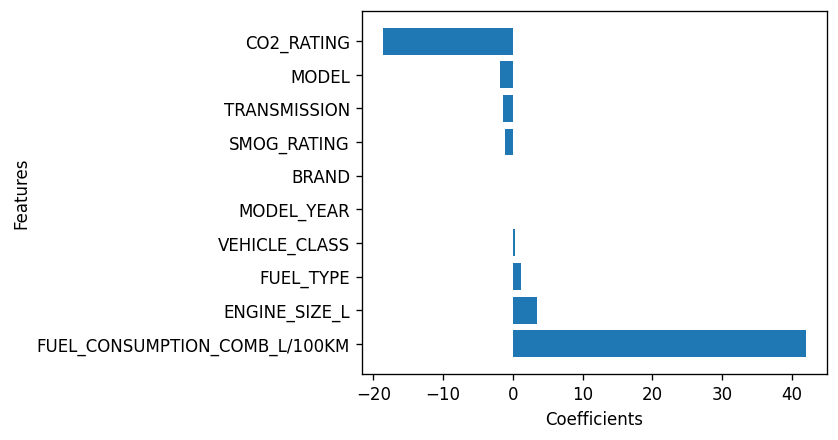

In [ ]:
plt.figure(figsize=(5,4),dpi=120)
a=coef_table['Features']
b=coef_table['Coefficients']
plt.barh(a,b)
plt.xlabel("Coefficients")
plt.ylabel("Features")



**Case 2**

In [ ]:
x2=df.drop(columns=[ 'CO2_EMISSIONS','CYLINDERS','FUEL_CONSUMPTION_HWY_L/100KM', 'FUEL_CONSUMPTION_COMB_L/100KM'])
y2=df['CO2_EMISSIONS']


x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.3, random_state = 42)
print('shape for x2_train: ',x2_train.shape)
print('shape for x2_test: ',x2_test.shape)
print('shape for y2_train: ',y2_train.shape)
print('shape for y2_test: ',y2_test.shape)


stnsc = StandardScaler()
x2_train = stnsc.fit_transform(x2_train)
x2_test = stnsc.fit_transform(x2_test)

model = LinearRegression()
model.fit(x2_train,y2_train)

y2_pred = model.predict(x2_test)
print(
    'number of predicted values: ',y2_pred.shape)

# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y2_test, y2_pred))
print(
  'mean_absolute_error : ', mean_absolute_error(y2_test, y2_pred))


r2_score_case2 = r2_score(y2_test, y2_pred)
print('r2 score for this case is ',r2_score_case2)


shape for x2_train:  (662, 11)
shape for x2_test:  (284, 11)
shape for y2_train:  (662,)
shape for y2_test:  (284,)
number of predicted values:  (284,)
mean_squared_error :  211.31824264282386
mean_absolute_error :  8.666560611351908
r2 score for this case is  0.9422358915298443


**Case -2 with SGD Regressor**

In [ ]:
# Tuning the SGDRegressor parameters 'eta0' (learning rate) and 'max_iter' using Grid Search
gd_sr.fit(x2_train, y2_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .......eta0=0.0001, max_iter=10000;, score=0.948 total time=   2.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



[CV 2/5] END .......eta0=0.0001, max_iter=10000;, score=0.962 total time=   2.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



[CV 3/5] END .......eta0=0.0001, max_iter=10000;, score=0.963 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



[CV 4/5] END .......eta0=0.0001, max_iter=10000;, score=0.961 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



[CV 5/5] END .......eta0=0.0001, max_iter=10000;, score=0.970 total time=   1.4s
[CV 1/5] END .......eta0=0.0001, max_iter=20000;, score=0.948 total time=   1.2s
[CV 2/5] END .......eta0=0.0001, max_iter=20000;, score=0.963 total time=   1.2s
[CV 3/5] END .......eta0=0.0001, max_iter=20000;, score=0.962 total time=   2.3s
[CV 4/5] END .......eta0=0.0001, max_iter=20000;, score=0.961 total time=   0.9s
[CV 5/5] END .......eta0=0.0001, max_iter=20000;, score=0.971 total time=   0.8s
[CV 1/5] END .......eta0=0.0001, max_iter=30000;, score=0.948 total time=   0.7s
[CV 2/5] END .......eta0=0.0001, max_iter=30000;, score=0.963 total time=   0.8s
[CV 3/5] END .......eta0=0.0001, max_iter=30000;, score=0.962 total time=   0.8s
[CV 4/5] END .......eta0=0.0001, max_iter=30000;, score=0.961 total time=   0.7s
[CV 5/5] END .......eta0=0.0001, max_iter=30000;, score=0.971 total time=   0.8s
[CV 1/5] END .......eta0=0.0001, max_iter=40000;, score=0.948 total time=   0.7s
[CV 2/5] END .......eta0=0.0

GridSearchCV(cv=5, estimator=SGDRegressor(penalty=None, random_state=1),
             param_grid={'eta0': [0.0001, 0.001, 0.01, 0.1, 1],
                         'max_iter': [10000, 20000, 30000, 40000]},
             refit='r2', scoring='r2', verbose=5)

In [ ]:

results = pd.DataFrame.from_dict(gd_sr.cv_results_)
print('Cross-validation results:\n', results)
 
r2_withsgd_case2 = gd_sr.best_score_
print('r2 score with Stocastic gradient decent for case 2 : ',r2_withsgd_case2)
  
best_model = gd_sr.best_estimator_
print('Intercept for case 2:' , best_model.intercept_)

Cross-validation results:
     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_eta0  \
0        1.772323      0.479525         0.001620        0.001007     0.0001   
1        1.286495      0.517553         0.002418        0.002907     0.0001   
2        0.757160      0.033977         0.000828        0.000018     0.0001   
3        0.748343      0.032619         0.000815        0.000022     0.0001   
4        0.146337      0.019507         0.000816        0.000021      0.001   
5        0.146894      0.012688         0.000828        0.000021      0.001   
6        0.147068      0.017755         0.000852        0.000051      0.001   
7        0.150502      0.015258         0.000813        0.000052      0.001   
8        0.008184      0.001264         0.000767        0.000073       0.01   
9        0.008659      0.002259         0.000761        0.000020       0.01   
10       0.008142      0.001423         0.000753        0.000030       0.01   
11       0.008087      0.

In [ ]:
coef_table2 = pd.DataFrame(zip(x.columns, best_model.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False)
coef_table

,Features,Coefficients
5,FUEL_CONSUMPTION_COMB_L/100KM,42.007592
4,ENGINE_SIZE_L,3.496252
7,FUEL_TYPE,1.208626
3,VEHICLE_CLASS,0.264475
0,MODEL_YEAR,0.000000
1,BRAND,-0.041343
9,SMOG_RATING,-1.069370
6,TRANSMISSION,-1.390244
2,MODEL,-1.843745
8,CO2_RATING,-18.653622


Text(0, 0.5, 'Features')

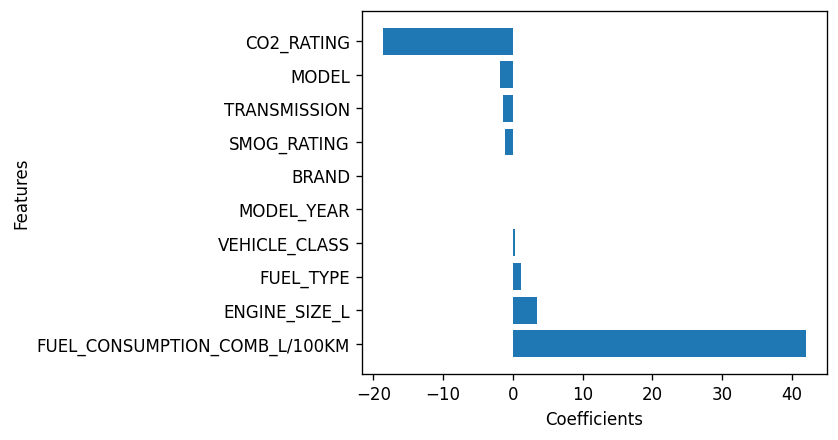

In [ ]:
plt.figure(figsize=(5,4),dpi=120)
a2=coef_table['Features']
b2=coef_table['Coefficients']
plt.barh(a2,b2)
plt.xlabel("Coefficients")
plt.ylabel("Features")

**Case -3**

In [ ]:
x3=df.drop(columns='CO2_EMISSIONS')
y3=df[['CO2_EMISSIONS']]
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.3, random_state = 42)
print(x3_train.shape)
print(x3_test.shape)
print(y3_train.shape)
print(y3_test.shape)
 
x3_train.mean()

stnsc = StandardScaler()
x3_train = stnsc.fit_transform(x3_train)
x3_test = stnsc.fit_transform(x3_test)


model = LinearRegression()
model.fit(x3_train,y3_train)

y3_pred = model.predict(x3_test)
print(y3_pred.shape)


# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y3_test, y3_pred))
print(
  'mean_absolute_error : ', mean_absolute_error(y3_test, y3_pred))


r2_score_case3 = r2_score(y3_test, y3_pred)

print(r2_score_case3)


(662, 14)
(284, 14)
(662, 1)
(284, 1)
(284, 1)
mean_squared_error :  214.59761732331123
mean_absolute_error :  7.180645425955315
0.9413394703198774


**Case -3 with SGD Regressor**

In [ ]:
gd_sr.fit(x3_train, y3_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END .......eta0=0.0001, max_iter=10000;, score=0.962 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END .......eta0=0.0001, max_iter=10000;, score=0.966 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END .......eta0=0.0001, max_iter=10000;, score=0.964 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END .......eta0=0.0001, max_iter=10000;, score=0.975 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END .......eta0=0.0001, max_iter=10000;, score=0.981 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END .......eta0=0.0001, max_iter=20000;, score=0.962 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END .......eta0=0.0001, max_iter=20000;, score=0.966 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END .......eta0=0.0001, max_iter=20000;, score=0.964 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END .......eta0=0.0001, max_iter=20000;, score=0.975 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END .......eta0=0.0001, max_iter=20000;, score=0.981 total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END .......eta0=0.0001, max_iter=30000;, score=0.962 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END .......eta0=0.0001, max_iter=30000;, score=0.966 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END .......eta0=0.0001, max_iter=30000;, score=0.964 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END .......eta0=0.0001, max_iter=30000;, score=0.975 total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END .......eta0=0.0001, max_iter=30000;, score=0.981 total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END .......eta0=0.0001, max_iter=40000;, score=0.962 total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END .......eta0=0.0001, max_iter=40000;, score=0.966 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END .......eta0=0.0001, max_iter=40000;, score=0.964 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END .......eta0=0.0001, max_iter=40000;, score=0.975 total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END .......eta0=0.0001, max_iter=40000;, score=0.981 total time=   0.7s
[CV 1/5] END ........eta0=0.001, max_iter=10000;, score=0.966 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END ........eta0=0.001, max_iter=10000;, score=0.970 total time=   0.2s
[CV 3/5] END ........eta0=0.001, max_iter=10000;, score=0.964 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END ........eta0=0.001, max_iter=10000;, score=0.980 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END ........eta0=0.001, max_iter=10000;, score=0.982 total time=   0.3s
[CV 1/5] END ........eta0=0.001, max_iter=20000;, score=0.966 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END ........eta0=0.001, max_iter=20000;, score=0.970 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END ........eta0=0.001, max_iter=20000;, score=0.964 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END ........eta0=0.001, max_iter=20000;, score=0.980 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END ........eta0=0.001, max_iter=20000;, score=0.982 total time=   0.3s
[CV 1/5] END ........eta0=0.001, max_iter=30000;, score=0.966 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END ........eta0=0.001, max_iter=30000;, score=0.970 total time=   0.1s
[CV 3/5] END ........eta0=0.001, max_iter=30000;, score=0.964 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END ........eta0=0.001, max_iter=30000;, score=0.980 total time=   0.1s
[CV 5/5] END ........eta0=0.001, max_iter=30000;, score=0.982 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END ........eta0=0.001, max_iter=40000;, score=0.966 total time=   0.1s
[CV 2/5] END ........eta0=0.001, max_iter=40000;, score=0.970 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END ........eta0=0.001, max_iter=40000;, score=0.964 total time=   0.1s
[CV 4/5] END ........eta0=0.001, max_iter=40000;, score=0.980 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END ........eta0=0.001, max_iter=40000;, score=0.982 total time=   0.2s
[CV 1/5] END .........eta0=0.01, max_iter=10000;, score=0.965 total time=   0.0s
[CV 2/5] END .........eta0=0.01, max_iter=10000;, score=0.969 total time=   0.0s
[CV 3/5] END .........eta0=0.01, max_iter=10000;, score=0.963 total time=   0.0s
[CV 4/5] END .........eta0=0.01, max_iter=10000;, score=0.980 total time=   0.0s
[CV 5/5] END .........eta0=0.01, max_iter=10000;, score=0.983 total time=   0.0s
[CV 1/5] END .........eta0=0.01, max_iter=20000;, score=0.965 total time=   0.0s
[CV 2/5] END .........eta0=0.01, max_iter=20000;, score=0.969 total time=   0.0s
[CV 3/5] END .........eta0=0.01, max_iter=20000;, score=0.963 total time=   0.0s
[CV 4/5] END .........eta0=0.01, max_iter=20000;, score=0.980 total time=   0.0s
[CV 5/5] END .........eta0=0.01, max_iter=20000;, score=0.983 total time=   0.0s
[CV 1/5] END .........eta0=0.01, max_iter=30000;, score=0.965 total time=   0.0s
[CV 2/5] END .........eta0=0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConv

[CV 3/5] END ..........eta0=0.1, max_iter=10000;, score=0.969 total time=   0.0s
[CV 4/5] END ..........eta0=0.1, max_iter=10000;, score=0.976 total time=   0.0s
[CV 5/5] END ..........eta0=0.1, max_iter=10000;, score=0.977 total time=   0.0s
[CV 1/5] END ..........eta0=0.1, max_iter=20000;, score=0.966 total time=   0.0s
[CV 2/5] END ..........eta0=0.1, max_iter=20000;, score=0.969 total time=   0.0s
[CV 3/5] END ..........eta0=0.1, max_iter=20000;, score=0.969 total time=   0.0s
[CV 4/5] END ..........eta0=0.1, max_iter=20000;, score=0.976 total time=   0.0s
[CV 5/5] END ..........eta0=0.1, max_iter=20000;, score=0.977 total time=   0.0s
[CV 1/5] END ..........eta0=0.1, max_iter=30000;, score=0.966 total time=   0.0s
[CV 2/5] END ..........eta0=0.1, max_iter=30000;, score=0.969 total time=   0.0s
[CV 3/5] END ..........eta0=0.1, max_iter=30000;, score=0.969 total time=   0.0s
[CV 4/5] END ..........eta0=0.1, max_iter=30000;, score=0.976 total time=   0.0s
[CV 5/5] END ..........eta0=

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConv

[CV 4/5] END eta0=1, max_iter=20000;, score=-1508957536813861.750 total time=   0.0s
[CV 5/5] END eta0=1, max_iter=20000;, score=-56276582337688.930 total time=   0.0s
[CV 1/5] END eta0=1, max_iter=30000;, score=-229126125880057.312 total time=   0.0s
[CV 2/5] END eta0=1, max_iter=30000;, score=-670626409897785.375 total time=   0.0s
[CV 3/5] END eta0=1, max_iter=30000;, score=-17933086905949844.000 total time=   0.0s
[CV 4/5] END eta0=1, max_iter=30000;, score=-1508957536813861.750 total time=   0.0s
[CV 5/5] END eta0=1, max_iter=30000;, score=-56276582337688.930 total time=   0.0s
[CV 1/5] END eta0=1, max_iter=40000;, score=-229126125880057.312 total time=   0.0s
[CV 2/5] END eta0=1, max_iter=40000;, score=-670626409897785.375 total time=   0.0s
[CV 3/5] END eta0=1, max_iter=40000;, score=-17933086905949844.000 total time=   0.0s
[CV 4/5] END eta0=1, max_iter=40000;, score=-1508957536813861.750 total time=   0.0s
[CV 5/5] END eta0=1, max_iter=40000;, score=-56276582337688.930 total t

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConv

GridSearchCV(cv=5, estimator=SGDRegressor(penalty=None, random_state=1),
             param_grid={'eta0': [0.0001, 0.001, 0.01, 0.1, 1],
                         'max_iter': [10000, 20000, 30000, 40000]},
             refit='r2', scoring='r2', verbose=5)

In [ ]:
results = pd.DataFrame.from_dict(gd_sr.cv_results_)
print('Cross-validation results:\n', results)
 
r2_withsgd_case3 = gd_sr.best_score_
print('r2 score with Stocastic gradient decent for case 3 : ',r2_withsgd_case3)
  
best_model = gd_sr.best_estimator_
print('Intercept for case 3:' , best_model.intercept_)

Cross-validation results:
     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_eta0  \
0        0.386550      0.024322         0.002145        0.000064     0.0001   
1        0.490131      0.142101         0.004892        0.004662     0.0001   
2        0.617706      0.047666         0.003207        0.000202     0.0001   
3        0.655140      0.068562         0.003173        0.000166     0.0001   
4        0.228257      0.042641         0.004611        0.003288      0.001   
5        0.223590      0.024767         0.003499        0.000901      0.001   
6        0.137481      0.017515         0.002341        0.000309      0.001   
7        0.132716      0.019042         0.002325        0.000503      0.001   
8        0.006305      0.001547         0.001947        0.000064       0.01   
9        0.005631      0.000790         0.001918        0.000039       0.01   
10       0.006138      0.001134         0.002237        0.000597       0.01   
11       0.006183      0.

In [ ]:
coef_table3 = pd.DataFrame(zip(x.columns, best_model.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False)
coef_table

,Features,Coefficients
5,FUEL_CONSUMPTION_COMB_L/100KM,42.007592
4,ENGINE_SIZE_L,3.496252
7,FUEL_TYPE,1.208626
3,VEHICLE_CLASS,0.264475
0,MODEL_YEAR,0.000000
1,BRAND,-0.041343
9,SMOG_RATING,-1.069370
6,TRANSMISSION,-1.390244
2,MODEL,-1.843745
8,CO2_RATING,-18.653622


Text(0, 0.5, 'Features')

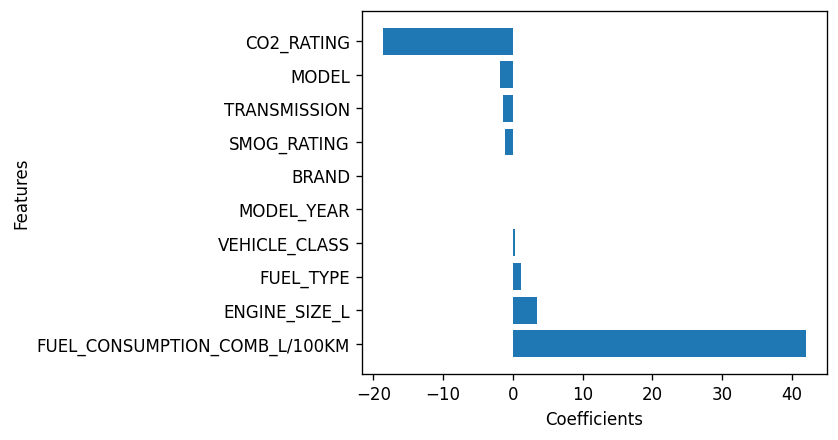

In [ ]:
plt.figure(figsize=(5,4),dpi=120)
a2=coef_table['Features']
b2=coef_table['Coefficients']
plt.barh(a2,b2)
plt.xlabel("Coefficients")
plt.ylabel("Features")

###**1.7 Comparing**

In [ ]:
R2_SCORE_withoutSGD = [r2_score_case1,r2_score_case2,r2_score_case3]
R2_SCORE_withSGD = [r2_withsgd_case1,r2_withsgd_case2,r2_withsgd_case3]

col={'Linear Regression':R2_SCORE_withoutSGD,'Stocastic Gradient Descent':R2_SCORE_withSGD}
cases=['Case 1','Case 2','Case 3']

f=pd.DataFrame(data=col,index=cases)
f


,Linear Regression,Stocastic Gradient Descent
Case 1,0.940640,0.971215
Case 2,0.942236,0.965124
Case 3,0.941339,0.972468


*the whole notebook takes 1:24 minutes to run*